<table>
 <tr align=left><td><img align=left src="./images/CC-BY.png">
 <td>Text provided under a Creative Commons Attribution license, CC-BY. All code is made available under the FSF-approved MIT license. (c) Marc Spiegelman,  Based on ipython notebook by Kyle Mandli from his course [Introduction to numerical methods](https://github.com/mandli/intro-numerical-methods)</td>
</table>

In [51]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import eigvals


# Exploring the Lorenz Equations

The Lorenz Equations are a 3-D dynamical system that is a simplified model of Rayleigh-Benard thermal convection.  They are derived and described in detail in Edward Lorenz' 1963 paper [Deterministic Nonperiodic Flow](http://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2)  in the Journal of Atmospheric Science.  In their classical form they can be written

$$ 
    \dot{X} = \sigma( Y - X)\\
    \dot{Y} = rX - Y - XZ \\
    \dot{Z} = XY -b Z
$$

where $\sigma$ is the "Prandtl Number",  $r = \mathrm{Ra}/\mathrm{Ra}_c$ is a scaled "Raleigh number" and $b$ is a parameter that is related to the the aspect ratio of a convecting cell in the original derivation.

This ipython notebook, will provide some simple python routines for numerical integration and visualization of the Lorenz Equations.  The primary code is modified from the Wikipedia [page](https://en.wikipedia.org/wiki/Lorenz_system)

## Some useful python routines

In [52]:
def Lorenz(state,t,sigma,r,b):
  '''
  Returns the RHS of the Lorenz equations
  '''
  # unpack the state vector
  x = state[0]
  y = state[1]
  z = state[2]

  # compute state derivatives
  xd = sigma * (y-x)
  yd = (r-z)*x - y
  zd = x*y - b*z

  # return the state derivatives
  return [xd, yd, zd]

def SolveLorenz(state0,t,sigma=10.,r=28.,b=8./3.0):
    '''
    use ODEINT to integrate the lorenz equations from initial condition state0 at t=0 for
    the range of times given in the numpy array t
    '''


    Lorenz_p = lambda state,t: Lorenz(state,t,sigma,r,b)
    state = odeint(Lorenz_p, state0, t)
    return state

def PlotLorenzXvT(state,t,sigma,r,b):
    '''
    make time series plots of solutions of the Lorenz equations X(t),Y(t),Z(t)
    '''

    plt.figure()
    ax = plt.subplot(111)
    X = state[:,0]
    Y = state[:,1]
    Z = state[:,2]
    ax.plot(t,X,'r',label='X')
    ax.hold(True)
    ax.plot(t,Y,'g',label='Y')
    ax.plot(t,Z,'b',label='Z')
    ax.set_xlabel('time t')
    plt.title('Lorenz Equations: $\sigma=${}, $r=${}, $b=${}'.format(sigma,r,b))
    # Shrink current axis's height by 10% on the bottom
    box = ax.get_position()
    ax.set_position([box.x0, box.y0 + box.height * 0.1,
                 box.width, box.height * 0.9])

    # Put a legend below current axis
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),ncol=3)
    plt.show()
    
  
    
def PlotLorenz3D(state,sigma,r,b):
    '''
    Show 3-D Phase portrait using mplot3D
    '''
    # do some fancy 3D plotting
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.plot(state[:,0],state[:,1],state[:,2])
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    plt.title('Lorenz Equations: $\sigma=${}, $r=${}, $b=${}'.format(sigma,r,b))
    plt.show()
    



## Subcritical behavior $r<1$

Here we will begin exploring the behavior of the Lorenz equations for fixed values of $\sigma$ and $b$ and just changing the Rayleigh number $r$.

We will begin with subcritical behavior $r=0.5$  which rapidly damps to a condition of no motion

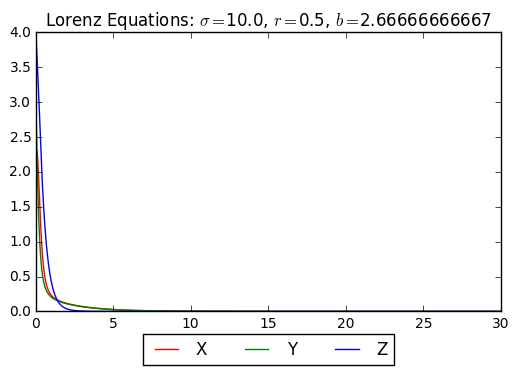

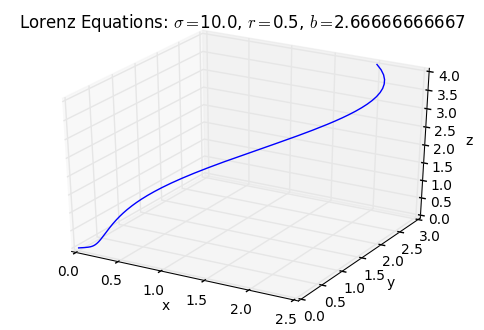

In [53]:
# Set the parameters
sigma= 10.
b = 8./3

# set the initial condition
X0 = [2.0, 3.0, 4.0]

# set the time for integration
t = np.arange(0.0, 30.0, 0.01)

# set the Rayleigh number
r = 0.5

# solve the Equations
state = SolveLorenz(X0,t,sigma,r,b)

# and Visualize as a time series
PlotLorenzXvT(state,t,sigma,r,b)

# and as a 3-D phase portrait
PlotLorenz3D(state,sigma,r,b)



## Damped Oscillation $r=10$

Now we increase the Rayleigh number to  $r=10$ which admits two steady solutions depending on initial condition.


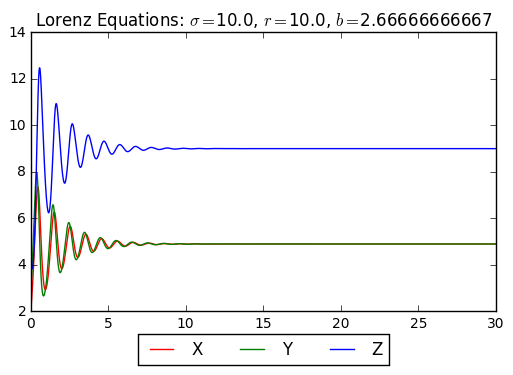

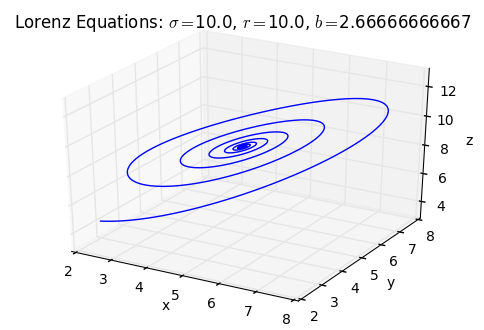

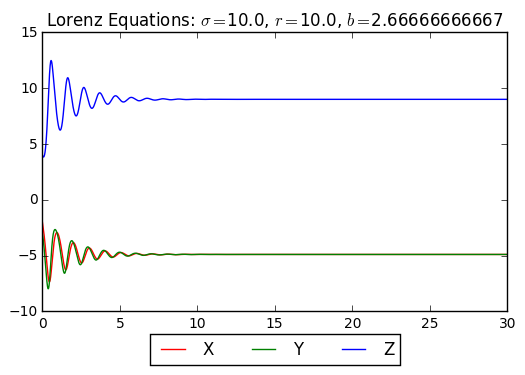

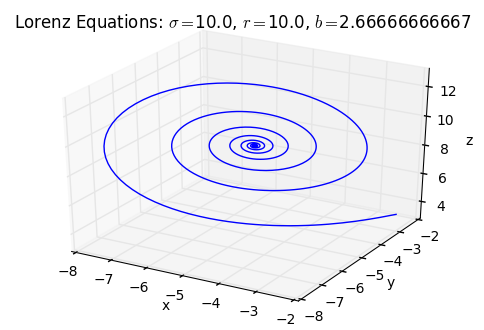

In [54]:
# set the Rayleigh number
r = 10.0
X0 = [2.,3.,4.]
state = SolveLorenz(X0,t,sigma,r,b)
PlotLorenzXvT(state,t,sigma,r,b)
PlotLorenz3D(state,sigma,r,b)

# now change the initial condition so X=-2
X0 = [-2.0, -3.0, 4.0]

state = SolveLorenz(X0,t,sigma,r,b)
PlotLorenzXvT(state,t,sigma,r,b)
PlotLorenz3D(state,sigma,r,b)

## Chaos and the strange attractor $r=28$

Now we increase the Rayleigh number to  $r=28$ and the solution becomes highly time-dependent and a-periodic.  


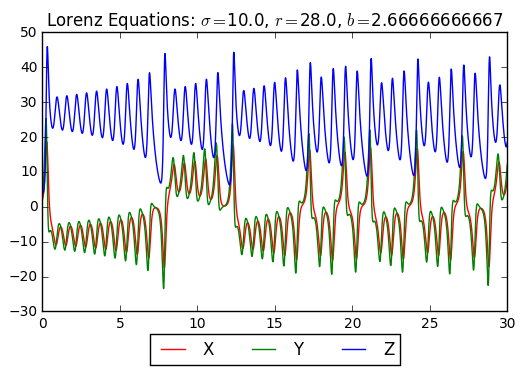

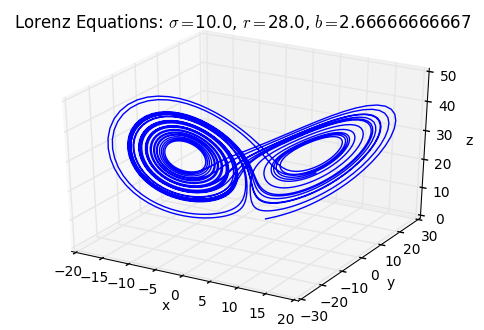

In [55]:
# set the Rayleigh number
r = 28.0
X0 = [2.,3.,4.]
state = SolveLorenz(X0,t,sigma,r,b)
PlotLorenzXvT(state,t,sigma,r,b)
PlotLorenz3D(state,sigma,r,b)


## Limit Cycle at large Rayleigh number

Now we increase the Rayleigh number to  $r=350$ and the solution goes to a periodic limit cycle  


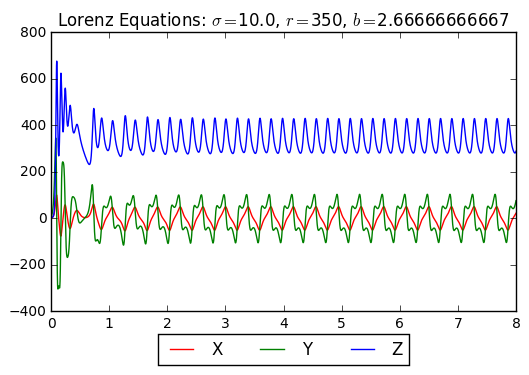

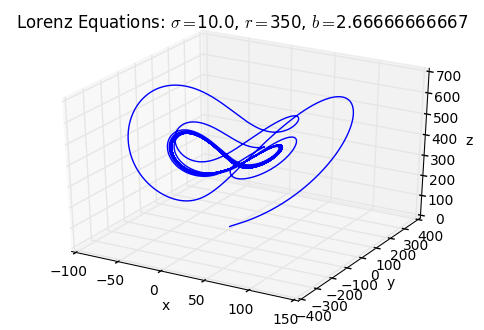

In [56]:
# set the Rayleigh number
r = 350
X0 = [2.,3.,4.]
t = np.arange(0,8.,.0001)
state = SolveLorenz(X0,t,sigma,r,b)
PlotLorenzXvT(state,t,sigma,r,b)
PlotLorenz3D(state,sigma,r,b)


# Stability of Fixed Points

It is straightforward to show that the Lorenz system has a fixed point at $X=Y=Z=0$ for all values of parameters $r,\sigma,b$.  Moreover, the Jacobian for the origin is

$$ 
    J = \left[
        \begin{matrix}
            -\sigma & \sigma & 0 \\
                 r & -1 & 0      \\ 
                 0 & 0 & -b 
        \end{matrix}
        \right]
$$
which has three negative eigenvalues for $r<1$ (Stable sink),  and 2 negative and 1 positive eigenvalue for $r > 1$ (3-D Saddle point).

At $r=1$, the Jacobian is singular and the origin undergoes a pitchfork bifurcation where two new fixed points appear at coordinates 
$$
    C^{\pm} = \left[
            \begin{matrix} 
            \pm\sqrt{b(r-1)} \\
            \pm\sqrt{b(r-1)} \\
            (r-1)
            \end{matrix}
            \right] 
$$

The stability of $C^+$ and $C^-$ depend on the eigenvalues of the Jacobian at these points, e.g 
$$ 
    J = \left[
        \begin{matrix}
            -\sigma & \sigma & 0 \\
                 1 & -1 & -x^+      \\ 
                 x^+ & x^+ & -b 
        \end{matrix}
        \right]
$$
where $x^+=\sqrt{b(r-1)}$.  These eigenvalues can be found as the roots of the cubic polynomial in $\lambda$ given by $|J -\lambda I|=0$ (which I will ask you to find in a homework problem).  But here we will just calculate and plot them numerically

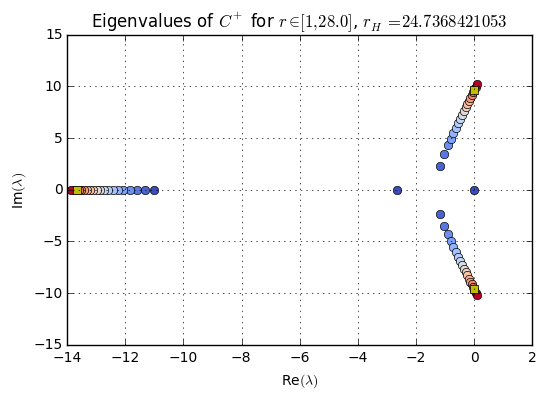

In [57]:
sigma = 10
b = 8./3.
r_H = sigma*(sigma+b+3)/(sigma-b -1.) # critical value of r at Hopf bifurcation
r_max = 28.
ra = np.linspace(1,28.,20)

xstar = lambda r: np.sqrt(b*(r-1))
J = lambda r: np.array([[-sigma,sigma,0],[1,-1,-xstar(r)],[xstar(r),xstar(r),-b]])

# plot out the eigenvalues
import  matplotlib.cm as cm
cmap = cm.get_cmap('coolwarm')

fig = plt.figure()
for r in ra:
    L = eigvals(J(r))
    plt.plot(np.real(L),np.imag(L),'o',color=cmap((r-min(ra))/(max(ra)-min(ra))))
    plt.hold(True)
# plot out eigenvalues at the Hopf Bifurcation
L = eigvals(J(r_H))
plt.plot(np.real(L),np.imag(L),'sy')
plt.xlabel('Re$(\lambda)$')
plt.ylabel('Im$(\lambda)$')
plt.title('Eigenvalues of $C^+$ for $r\in[1,{}]$, $r_H={}$'.format(max(ra),r_H))
plt.grid()
plt.show()